<h2>7-1 결측치 정제하기</h2>

결측치 만들기

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex'     : ['M', 'F', np.nan, 'M', 'F'],
									 'score'   : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
# NaN이 있는 상태로 연산하면 출력 결과도 NaN이 됨
df['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

결측치 확인하기

In [4]:
pd.isna(df)         # 결측치 확인

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [5]:

pd.isna(df).sum()   # 결측치 빈도 확인

sex      1
score    1
dtype: int64

결측치 제거하기
<br/><br/>결측치 있는 행 제거하기

In [6]:
df.dropna(subset = ['score'])      # score 결측치 제거 (score가 결측치가 아닌 행만 출력됨)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [7]:
df_nomiss = df.dropna(subset = ['score'])   # score 결측치 제거된 데이터 만들기
df_nomiss['score'] + 1                      # score로 연산

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

여러 변수에 결측치 없는 데이터 추가하기

In [8]:
df_nomiss = df.dropna(subset = ['score', 'sex'])    # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


결측치가 하나라도 있으면 제거하기

In [9]:
df_nomiss2 = df.dropna()     # 모든 변수에 결측치 없는 데이터 추출
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


결측치 대체하기
- 평균값으로 결측치 대체하기

In [10]:
# 실습을 위해 exam.csv 파일을 불러와 일부 값을 결측치로 바꿈
exam = pd.read_csv('D:/WE_IT/doit/bookdata/exam.csv')   # 데이터 불러오기
exam.loc[[2,7,14], ['math']] = np.nan                   # 2, 7, 14행의 math에 NaN 할당   (df.loc[행위치,열위치]는 데이터의 위치를 지칭하는 역할을 함)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [11]:
# math의 평균값 구하기
exam['math'].mean()

55.23529411764706

In [12]:
exam['math'] = exam['math'].fillna(55)     # math가 NaN이면 55로 대체
exam                                       # 출력

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [13]:
exam['math'].isna().sum()                  # 결측치 빈도 확인 -> 0이 출력

0

<h2>7-2 이상치 정제하기</h2>

이상치 제거하기 - 존재할 수 없는 값

In [15]:
# 실습을 위해 이상치가 들어 있는 데이터를 만들기  (1과 2 둘 중 하나로 분류되는 sex 변수와 1~5점으로 된 score 변수임)
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


이상치 확인하기

In [16]:
df['sex'].value_counts().sort_index()       # sex에 존재할 수 없는 값 3이 하나 있다는 것을 알 수 있음.  (sort_index()를 적용해야 변수의 값 순서로 정렬함)


sex
1    3
2    2
3    1
Name: count, dtype: int64

In [17]:
df['score'].value_counts().sort_index()     # score에 존재할 수 없는 값 6이 하나 있다는 것을 알 수 있음.

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

결측 처리하기

In [18]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])       
df                                                            

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [19]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [20]:
df.dropna(subset = ['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


이상치 제거하기 - 극단적인 값

상자 그림으로 극단치 기준 정하기

<Axes: ylabel='hwy'>

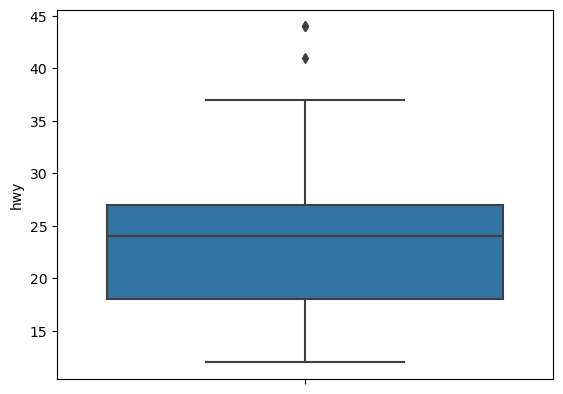

In [21]:
# mpg 데이터의 hwy 변수로 상자 그림 만들기
mpg = pd.read_csv('D:/WE_IT/doit/bookdata/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

극단치 기준 값 구하기

1) 1사분위수, 3사분위수

In [22]:
pct25 = mpg['hwy'].quantile(.25)        # 하위 25%에 해당하는 1사분위수 
pct25

18.0

In [23]:
pct75 = mpg['hwy'].quantile(.75)        # 하위 75%에 해당하는 3사분위수
pct75

27.0

2. IQR 구하기

In [24]:
iqr = pct75 - pct25
iqr

9.0

3. 하한, 상한 구하기

In [25]:
pct25 - 1.5 * iqr      # 하한

4.5

In [26]:
pct75 + 1.5 * iqr      # 상한

40.5

극단치를 결측 처리하기

In [27]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), 
												np.nan, mpg['hwy'])
												
# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

결측치 제거하고 분석하기

In [28]:
# drv에 따라 hwy 평균이 어떻게 다른지 알아보기
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
